<a id="section_CART"></a> 
## Workshop Final DS Digital House

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)
import missingno as msno
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing

%matplotlib inline

## Importando os dados

In [2]:
# importando bases de treino e teste
df_test = pd.read_csv(r"../DataSet/test.csv", low_memory = False)
df_train = pd.read_csv(r"../DataSet/train.csv", low_memory = False)

## Agrupando os datasets para limpar os dados

In [3]:
# incluindo colunas para sperar os dados da mesma maneira que estavam originalmente
df_train['test'] = 0
df_test['test'] = 1

# incluindo coluna de score com nan nos dados de teste
df_test['Credit_Score'] = np.nan

In [4]:
# concatenando os datasets ja que eles tem as mesmas colunas

df_total = pd.concat([df_train, df_test], ignore_index = True)

In [5]:
print('dados de treino: ', df_train.shape)
print('dados de teste: ', df_test.shape)
print('todos os dados agrupados: ', df_total.shape)

dados de treino:  (100000, 29)
dados de teste:  (50000, 29)
todos os dados agrupados:  (150000, 29)


## Colunas dataset:

* ID - Identificador de entrada
* Customer_ID - ID cliente
* Month - Mês do ano
* Name - nome do cliente
* Age - Idade Cliente
* SSN - Social Security Number (CPF no Brasil)
* Occupation - Ocupação do cliente
* Annual_Income - renda anual
* Monthly_Inhand_Salary - Salario mensal do cliente
* Num_Bank_Accounts - quantidade de contas em bancos
* Num_Credit_Card - quantidade de cartões de crédito
* Interest_Rate - taxa de juros cartão de crédito
* Num_of_Loan - Quantidade de empréstimos feitos no banco
* Type_of_Loan - tipo de empréstimo feito pelo cliente
* Delay_from_due_date - qtd. de dias de atraso pagamento cartão
* Num_of_Delayed_Payment - Média de pagamentos atrasado pelo cliente
* Changed_Credit_Limit - Variação percentual de limite do cartão de crédito
* Num_Credit_Inquiries - Quantidade de "cobranças" no cartão
* Credit_Mix - mix de crédito do cliente
* Outstanding_Debt - restante à ser pago da dívida
* Credit_Utilization_Ratio - Taxa de utlização do cartão de crédito
* Credit_History_Age - Tempo de histórico de crédito do cliente
* Payment_of_Min_Amount - Pagamento minimo
* Total_EMI_per_month - Pagamento fixo em dolares por mes
* Amount_invested_monthly - Quantidade de dinheiro investido pelo cliente mensalmente
* Payment_Behaviour - Comportamento de pagamento cliente
* Monthly_Balance - Saldo Mensal Cliente
* Credit_Score - Target
* test - coluna utilizada para separar o dataset nos dados de treino e teste

## Checando os principais valores de algumas colunas

In [6]:
colunas = df_total.columns

for coluna in colunas:
    print('Variavel: ', coluna)
    print(20*'-')
    print(df_total[coluna].value_counts(dropna=False))

Variavel:  ID
--------------------
0x26fe     1
0x1c571    1
0x9ffc     1
0xd08e     1
0x21949    1
          ..
0x1b916    1
0x145db    1
0xc1c7     1
0x232ac    1
0x1e9e7    1
Name: ID, Length: 150000, dtype: int64
Variavel:  Customer_ID
--------------------
CUS_0xa2b8    12
CUS_0x1e9e    12
CUS_0x44a4    12
CUS_0xabc6    12
CUS_0x43ee    12
              ..
CUS_0x2413    12
CUS_0x8e72    12
CUS_0x7512    12
CUS_0xa530    12
CUS_0xb22     12
Name: Customer_ID, Length: 12500, dtype: int64
Variavel:  Month
--------------------
April        12500
July         12500
December     12500
September    12500
May          12500
January      12500
March        12500
November     12500
August       12500
June         12500
February     12500
October      12500
Name: Month, dtype: int64
Variavel:  Name
--------------------
NaN                15000
Stevex                66
Langep                65
Jessicad              59
Vaughanl              58
                   ...  
en Klaymanf            7
L

### Observações

1. Colunas numéricas com "_" ok
    * Age,
    * Annual_Income,
    * Monthly_Inhand_Salary,
    * Num_Bank_Accounts,
    * Num_Credit_Card,
    * Interest_Rate
    * Num_of_Loan
    * Delay_from_due_date
    * Num_of_Delayed_Payment
    * Changed_Credit_Limit
    * Num_Credit_Inquiries
    * Outstanding_Debt
    * Credit_Utilization_Ratio
    * Total_EMI_per_month
    * Amount_invested_monthly
    * Monthly_Balance
2. SSN #F%$D@*&8 ok
3. Occupation _______ ok
4. Type_of_Loan - transformar em lista e indexar
5. Changed_Credit_Limit "_" -> NaN ok
6. Credit_Mix "_" -> NaN ok
7. Credit_History_Age Transformar em qtd. Meses
8. Payment_of_Min_Amount "NM" -> NaN ok
9. Payment_Behaviour "!@9#%8" -> NaN e transformar dado ok

## ajustando os campos númericos que estão definidos como string por terem underlines em alguns registros

In [7]:
# Campos númericos que estão como string - retirar underline dos numeros

colunas_ul = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in colunas_ul:
    df_total[row] = df_total[row].str.replace(r'_+', '')

<ipython-input-7-307ac66e0f28>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_total[row] = df_total[row].str.replace(r'_+', '')


## Data Wrangling

In [8]:
# removendo caracter estranho do SSN
df_total['SSN'].replace('#F%$D@*&8', np.NaN, inplace=True)

# removendo os underlines e colocando NaN na coluna Occupation
df_total['Occupation'].replace('_______', np.NaN, inplace=True)

df_total['Changed_Credit_Limit'].replace(['_', ''], np.NaN, inplace=True)

df_total['Credit_Mix'].replace('_', np.NaN, inplace=True)

df_total['Payment_of_Min_Amount'].replace('NM', np.NaN, inplace=True)

df_total['Payment_Behaviour'].replace('!@9#%8', np.NaN, inplace=True)

In [9]:
# convertendo Credit_History_Age em quantidade de meses
def converter_mes(x):
    if pd.notnull(x):
        ano = int(x.split(' ')[0])
        mes = int(x.split(' ')[3])
        return (ano*12)+mes
    else:
        return x

df_total['Credit_History_age'] = df_total['Credit_History_Age'].apply(lambda x: converter_mes(x)).astype(float)

In [10]:
df_total['Type_of_Loan_ajustado'] = df_total['Type_of_Loan'].replace("[abc]* and ", " ", regex=True)

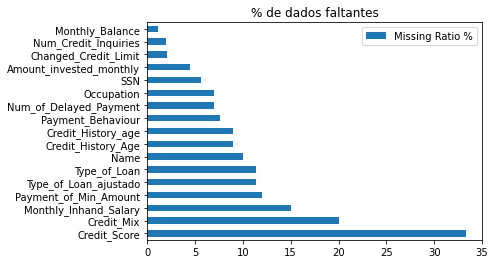

In [11]:
# Esta função define a quantidade % de dados faltantes
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title("% de dados faltantes")
        plt.show()
    else:
        print('No NAs found')
        
plot_nas(df_total)

In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       141600 non-null  object 
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [13]:
#criando dicionario e convertendo os dados

dicionario_conversao = {
    'Age': int,
    'Num_Bank_Accounts': int,
    'Num_Credit_Card': int,
    'Num_of_Loan': int,
    'Annual_Income' : float,
    'Monthly_Inhand_Salary' : float,
    'Interest_Rate' : float,
    'Delay_from_due_date' : float,
    'Changed_Credit_Limit' : float,
    'Num_Credit_Inquiries' : float,
    'Outstanding_Debt' : float,
    'Credit_Utilization_Ratio' : float,
    'Amount_invested_monthly' : float,
    'Total_EMI_per_month' : float,
    'Num_of_Delayed_Payment' : float,
    'ID' : object,
    'Customer_ID' : object,
    'Name' : object,
    'Month' : object,
    'SSN' : object,
    'Type_of_Loan' : object,
    'Occupation' : object,
    'Credit_Mix' : object,
    'Payment_of_Min_Amount' : object,
    'Payment_Behaviour' : object,
    'test' : object
    }
# aplicando as type para variaveis

df_total = df_total.astype(dicionario_conversao)

In [14]:
df_total.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,test,Credit_History_age,Type_of_Loan_ajustado
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good,0,265.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good,0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good,0,267.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good,0,268.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good,0,269.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


### Data cleaning - Age

 * Limitando a idade dos clientes de 0 a 100

count    145823.000000
mean         33.490896
std          10.780566
min          14.000000
25%          25.000000
50%          33.000000
75%          42.000000
max         100.000000
Name: Age, dtype: float64


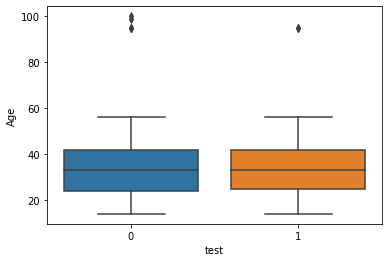

In [15]:
df_total = df_total[(df_total['Age'] <= 100) & (df_total['Age'] >= 0)]

sns.boxplot(data=df_total, y='Age', x='test')

print(df_total.Age.describe())

### Concentração por tipo de ocupação

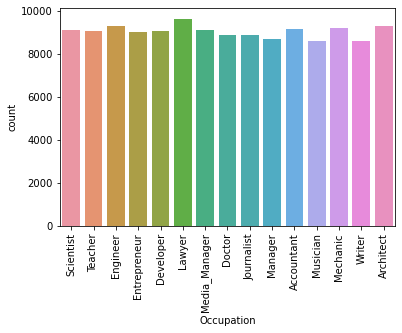

In [16]:
sns.countplot(data=df_total, x = 'Occupation')
plt.xticks(rotation=90)
plt.show()

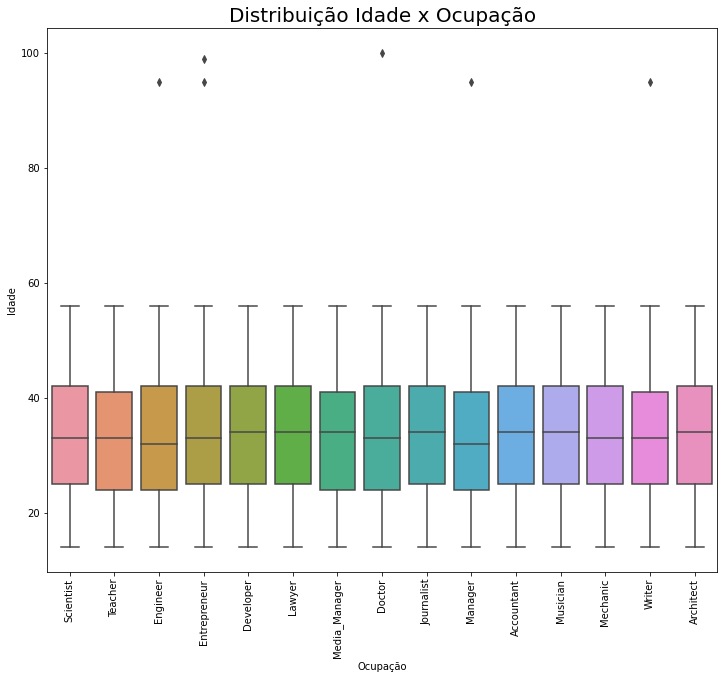

In [17]:
f, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(data = df_total, y = 'Age', x = 'Occupation')
plt.xticks(rotation = 90)
plt.title('Distribuição Idade x Ocupação', size = 20)
plt.xlabel('Ocupação')
plt.ylabel('Idade')
plt.show()

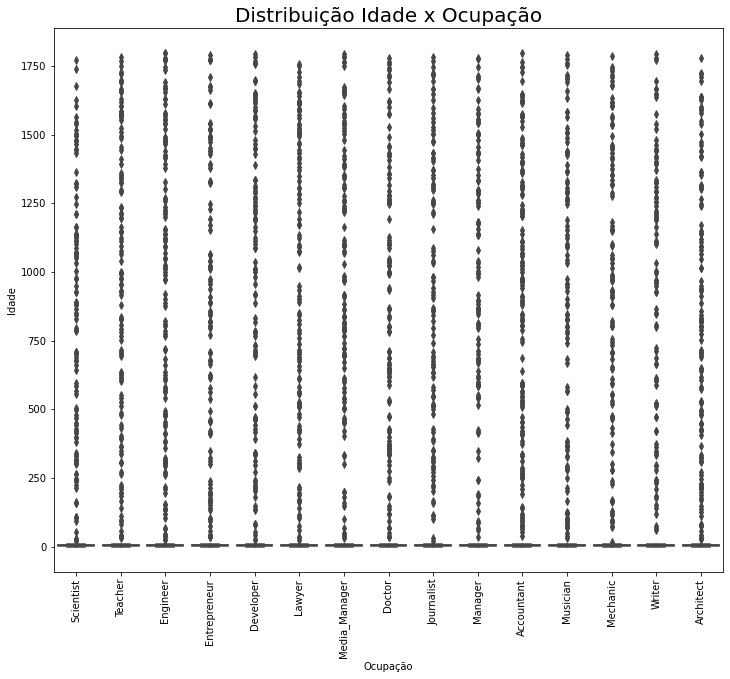

count    145823.000000
mean         17.001961
std         117.075065
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64


In [18]:
f, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(data = df_total, y = 'Num_Bank_Accounts', x = 'Occupation')
plt.xticks(rotation = 90)
plt.title('Distribuição Idade x Ocupação', size = 20)
plt.xlabel('Ocupação')
plt.ylabel('Idade')
plt.show()
print(df_total.Num_Bank_Accounts.describe())

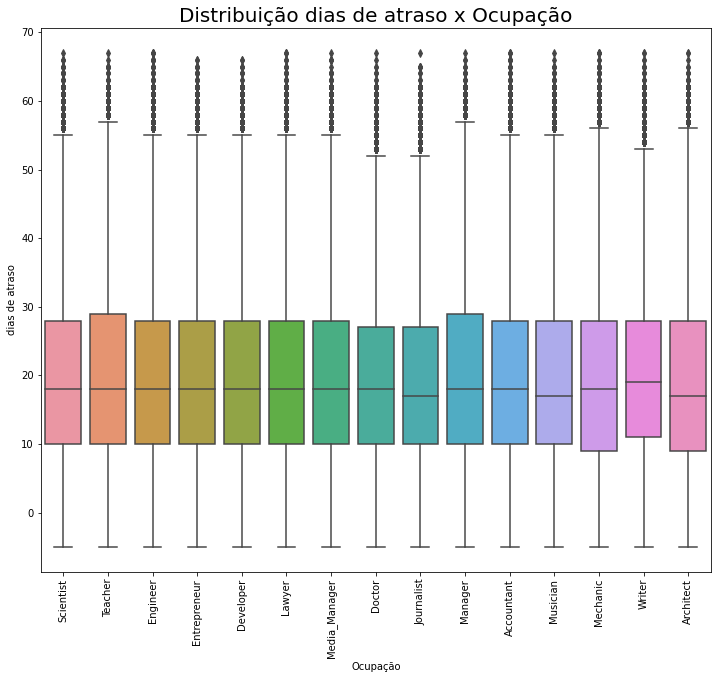

count    145823.000000
mean         21.061534
std          14.861381
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


In [19]:
f, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(data = df_total, y = 'Delay_from_due_date', x = 'Occupation')
plt.xticks(rotation = 90)
plt.title('Distribuição dias de atraso x Ocupação', size = 20)
plt.xlabel('Ocupação')
plt.ylabel('dias de atraso')
plt.show()
print(df_total.Delay_from_due_date.describe())

In [20]:
df_total.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'test', 'Credit_History_age', 'Type_of_Loan_ajustado'],
      dtype='object')

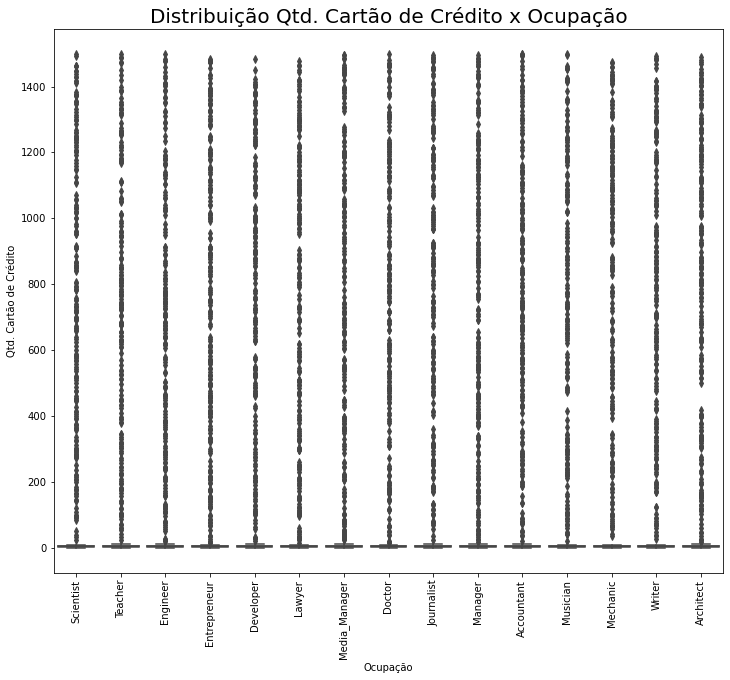

count    145823.000000
mean         22.586848
std         128.930363
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max        1499.000000
Name: Num_Credit_Card, dtype: float64


In [21]:
f, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(data = df_total, y = 'Num_Credit_Card', x = 'Occupation')
plt.xticks(rotation = 90)
plt.title('Distribuição Qtd. Cartão de Crédito x Ocupação', size = 20)
plt.xlabel('Ocupação')
plt.ylabel('Qtd. Cartão de Crédito')
plt.show()
print(df_total.Num_Credit_Card.describe())

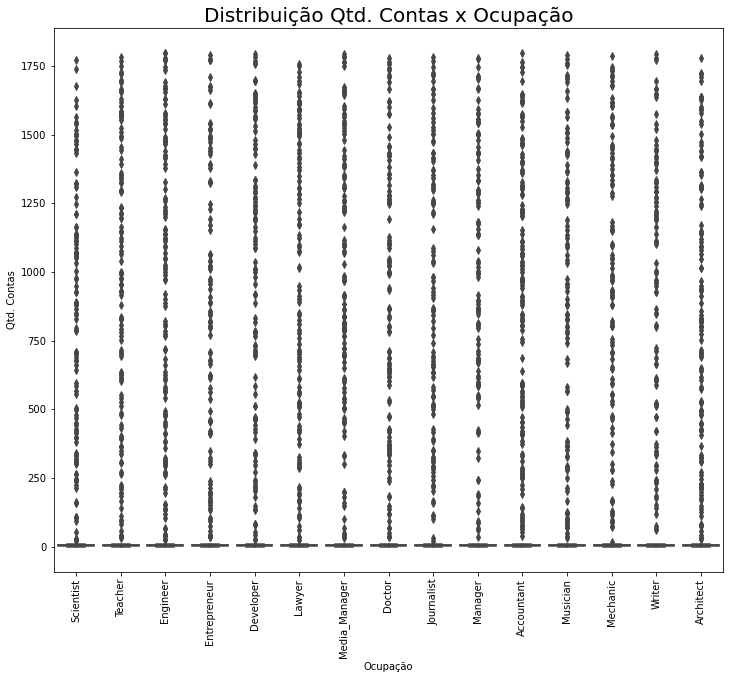

count    145823.000000
mean         17.001961
std         117.075065
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64


In [22]:
f, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(data = df_total, y = 'Num_Bank_Accounts', x = 'Occupation')
plt.xticks(rotation = 90)
plt.title('Distribuição Qtd. Contas x Ocupação', size = 20)
plt.xlabel('Ocupação')
plt.ylabel('Qtd. Contas')
plt.show()
print(df_total.Num_Bank_Accounts.describe())

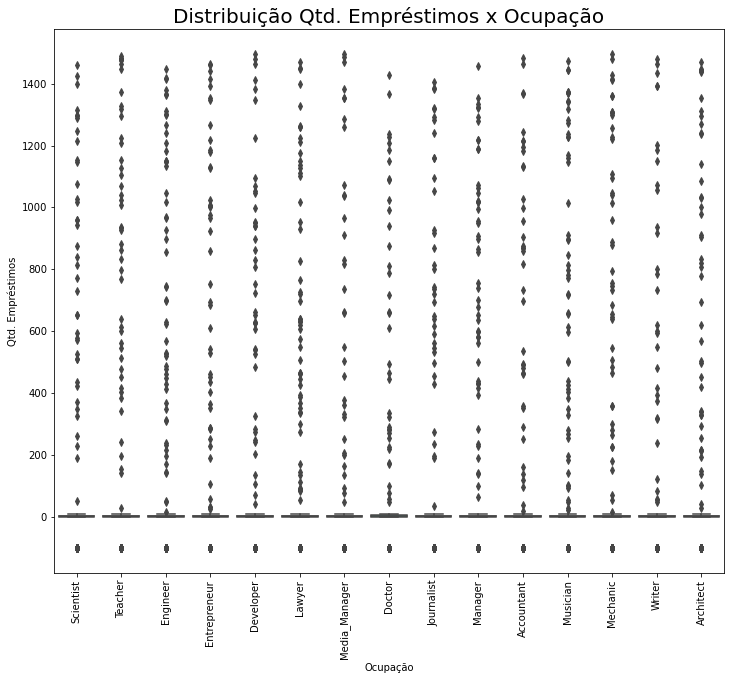

count    145823.000000
mean          3.095719
std          63.560810
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64


In [23]:
f, ax = plt.subplots(figsize = (12, 10))
sns.boxplot(data = df_total, y = 'Num_of_Loan', x = 'Occupation')
plt.xticks(rotation = 90)
plt.title('Distribuição Qtd. Empréstimos x Ocupação', size = 20)
plt.xlabel('Ocupação')
plt.ylabel('Qtd. Empréstimos')
plt.show()
print(df_total.Num_of_Loan.describe())

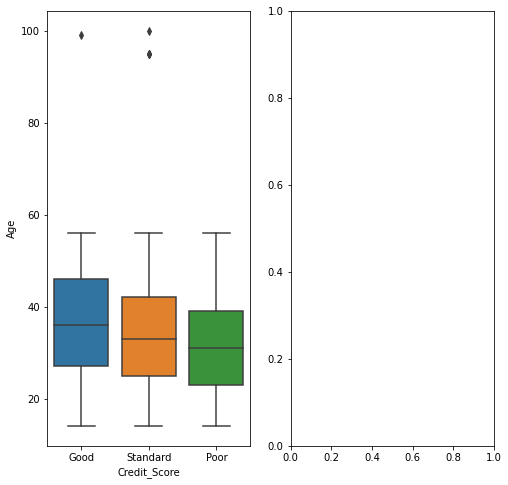

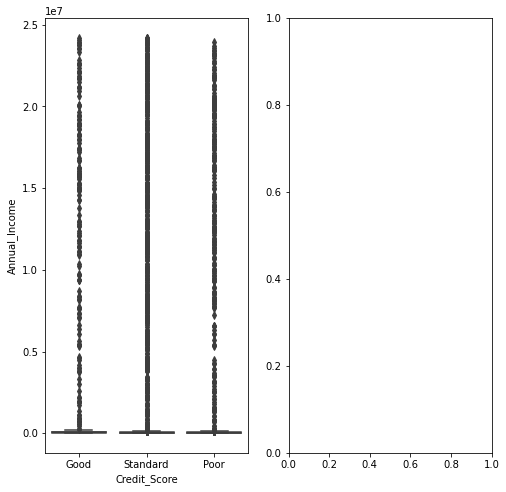

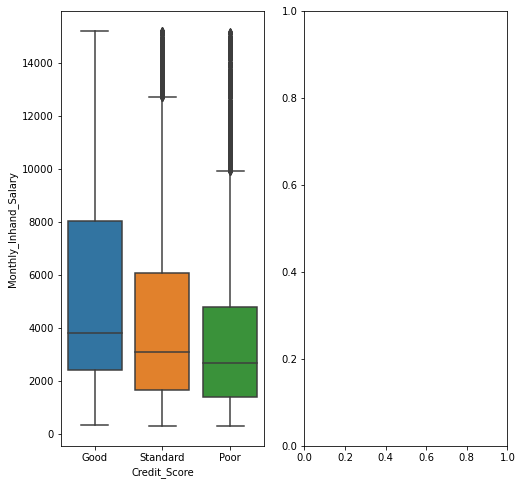

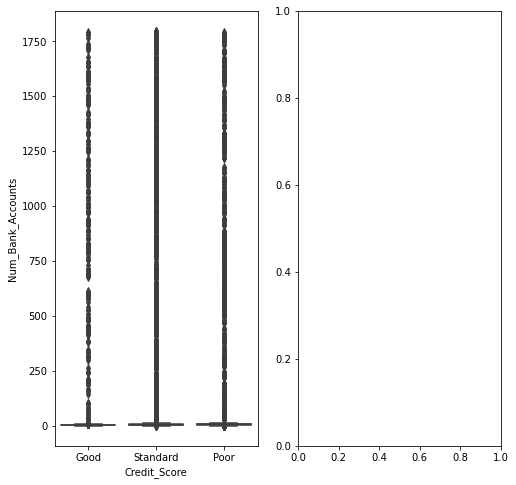

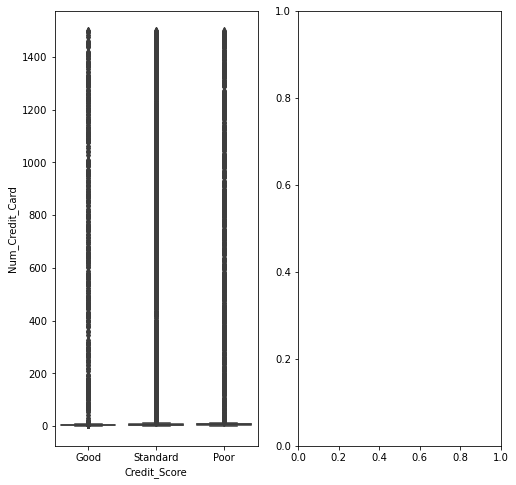

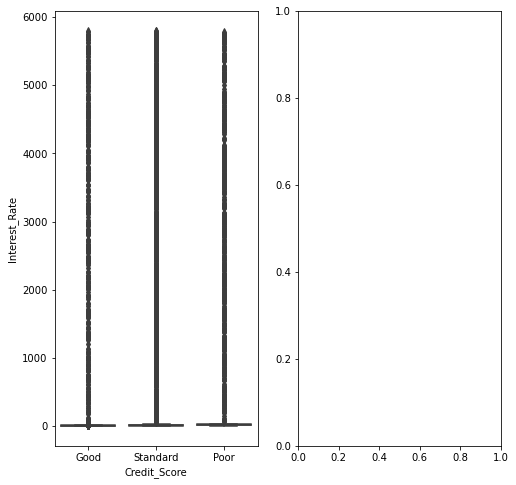

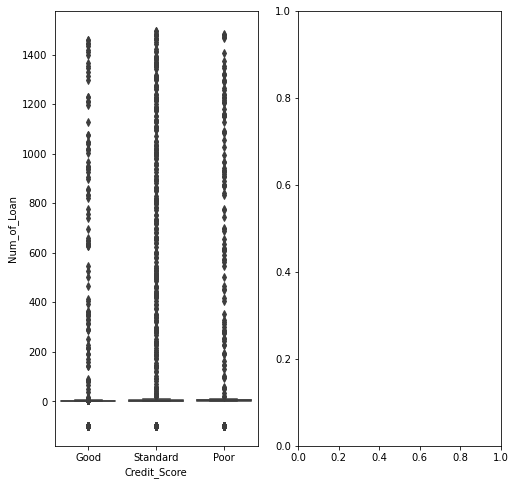

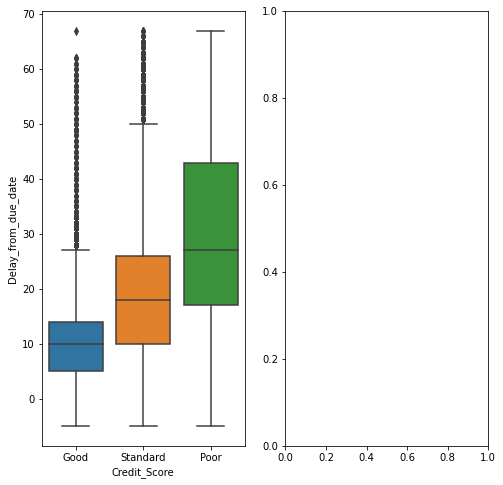

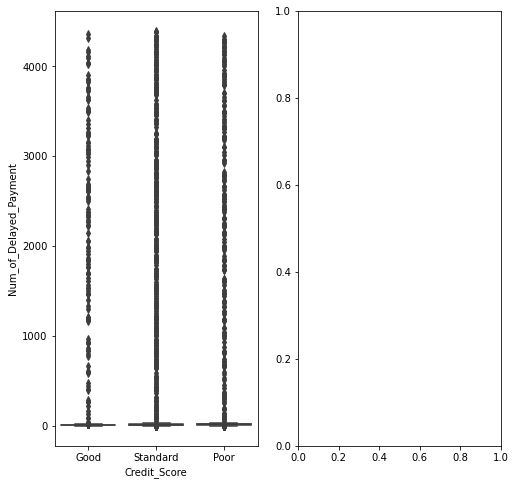

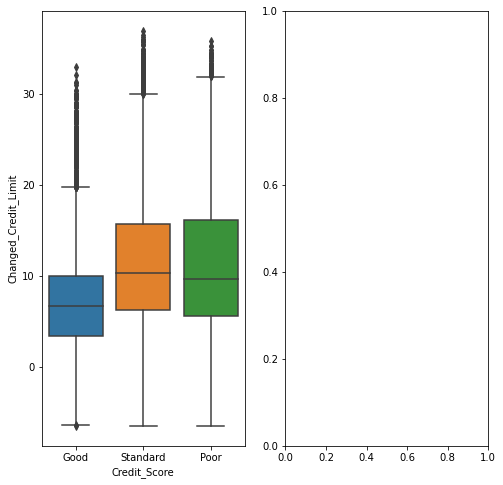

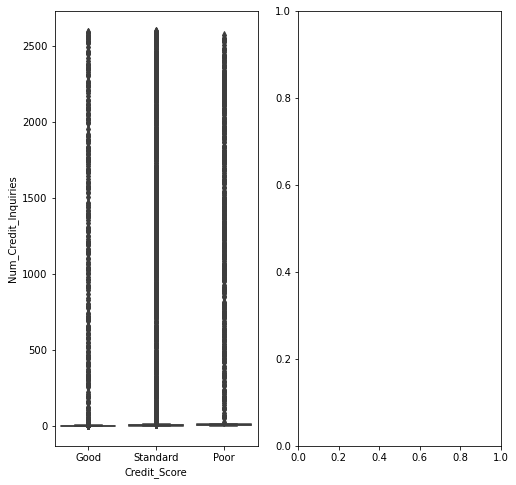

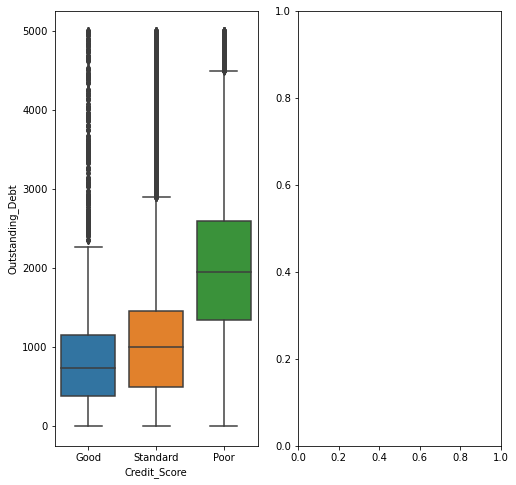

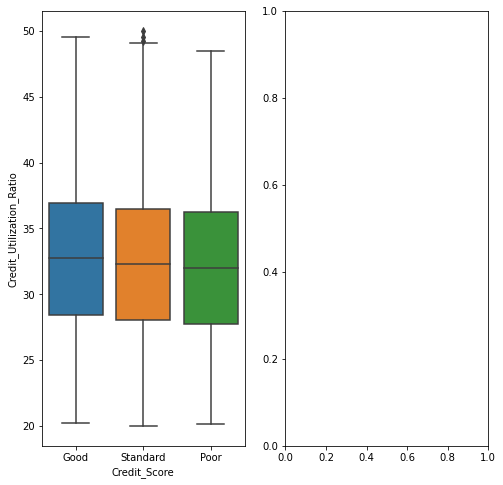

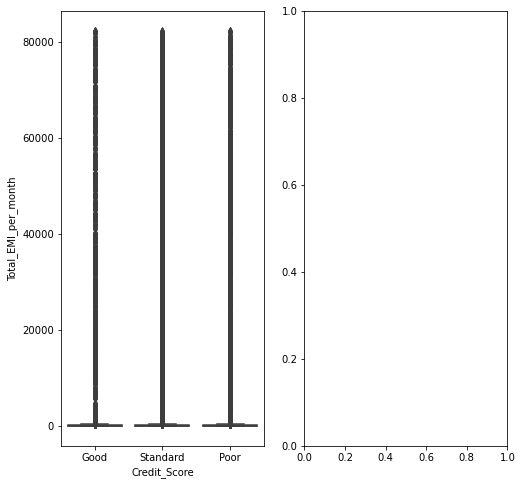

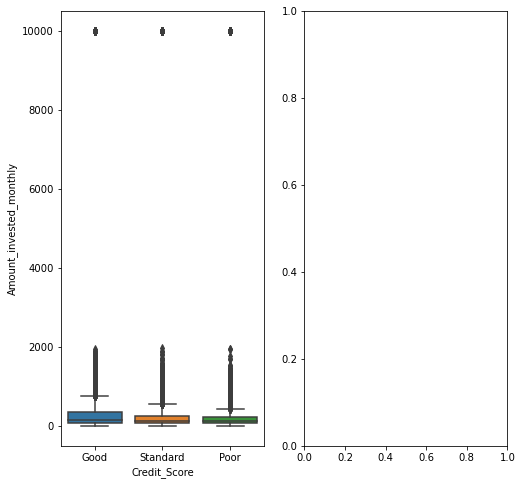

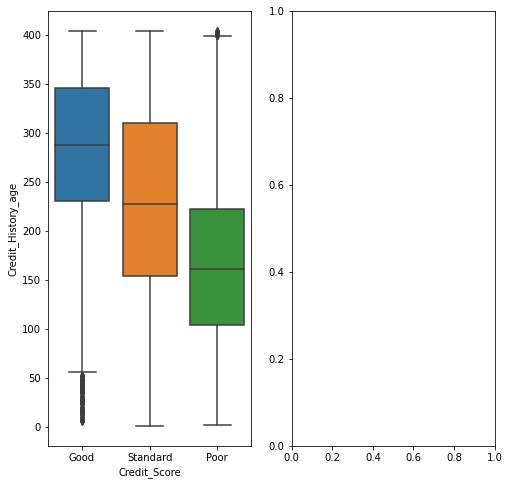

In [24]:
numCols = df_total.select_dtypes([np.number]).columns

for col in numCols:
    fig, ax = plt.subplots(1, 2, figsize = (8,8))
    sns.boxplot(data=df_total, y=col, x = 'Credit_Score', ax=ax[0]) #color = ['#f5190a', '#1e9e19', '#dede16'])
    #sns.scatterplot(data=df_total,x = 'Credit_Score', y = s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()


<AxesSubplot:>

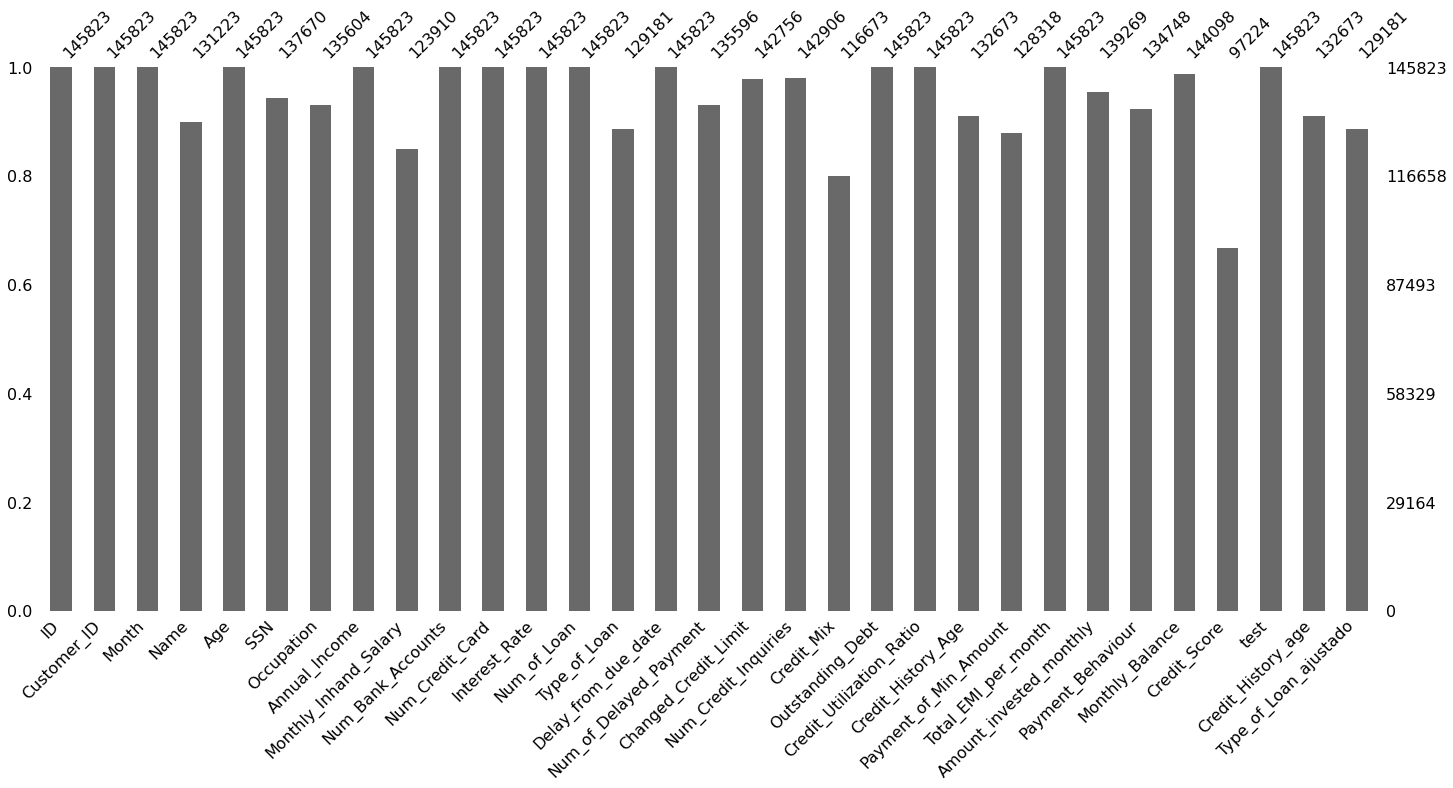

In [25]:
msno.bar(df_total)

c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


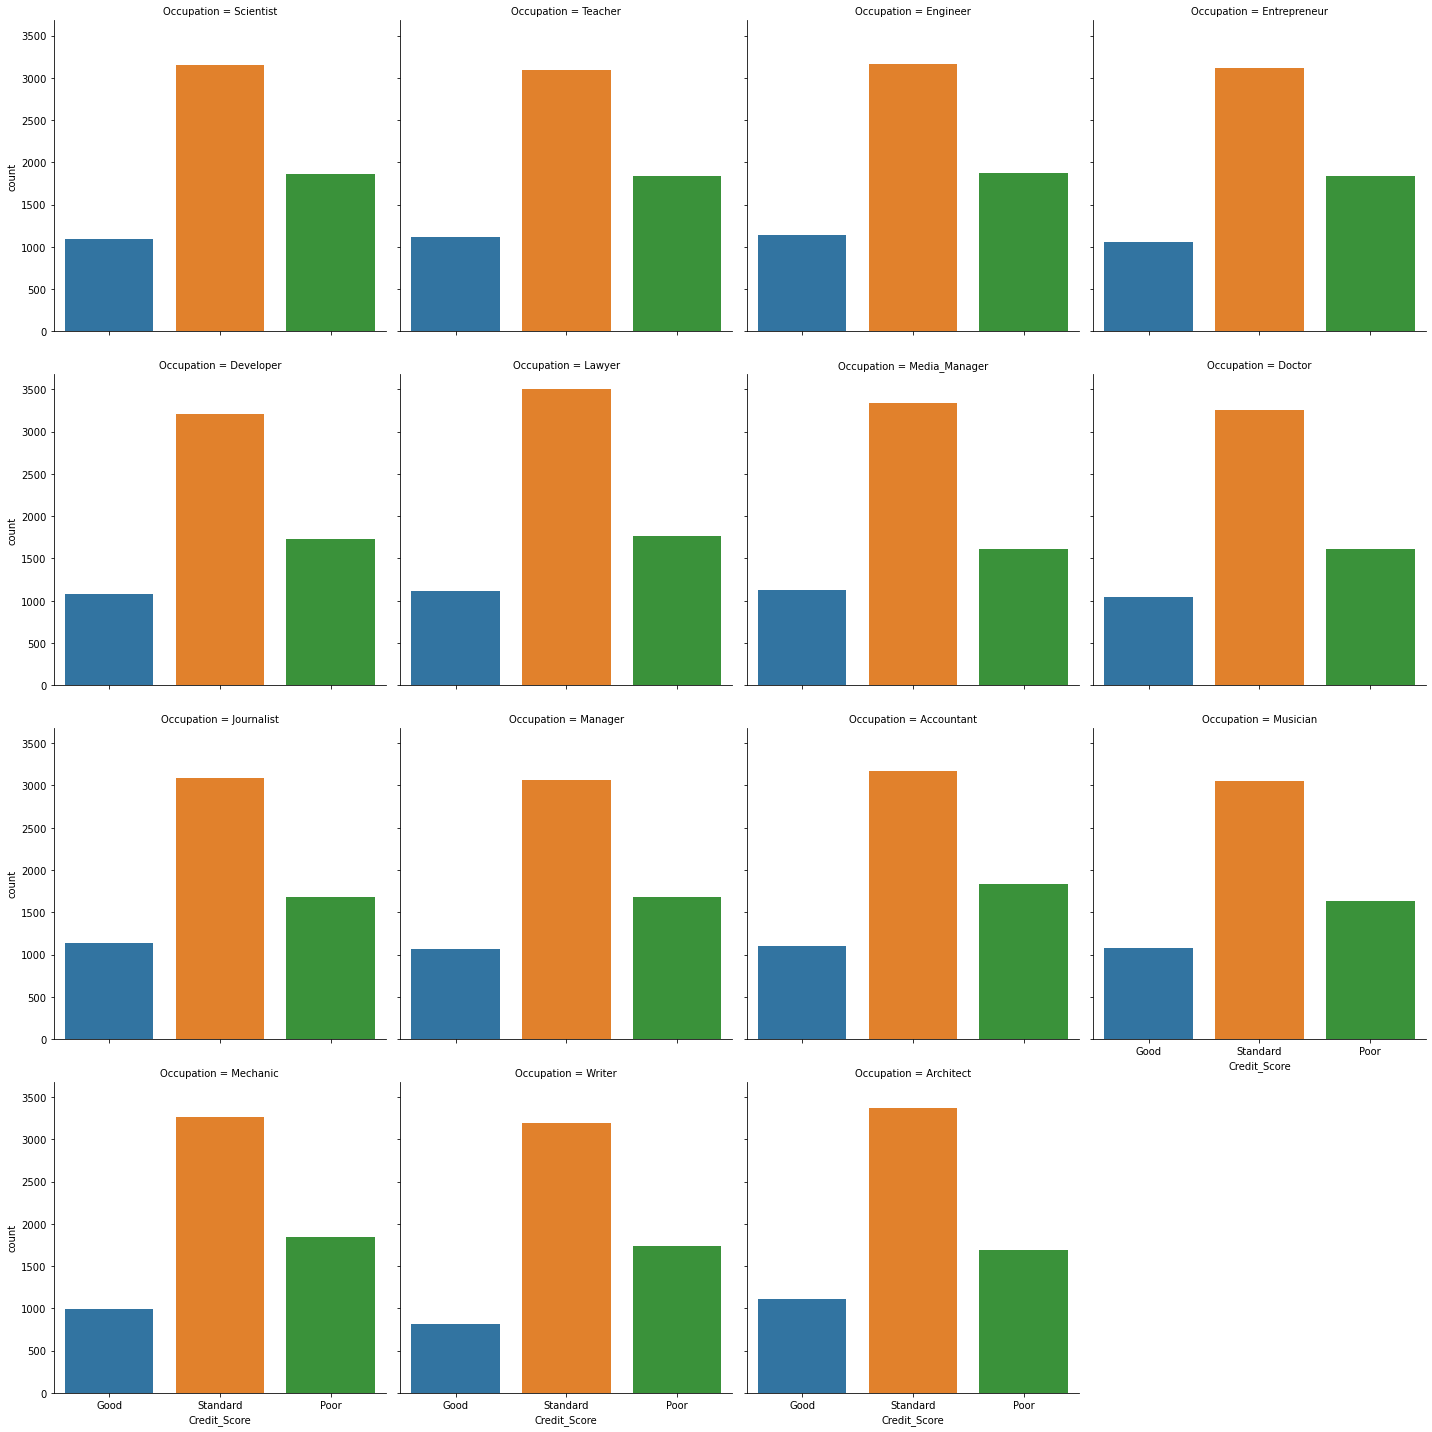

In [26]:
sns.factorplot('Credit_Score', col = 'Occupation', data = df_total, kind = 'count', col_wrap = 4)

c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Felipe\anaconda3\envs\dhdsblend2022_main\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

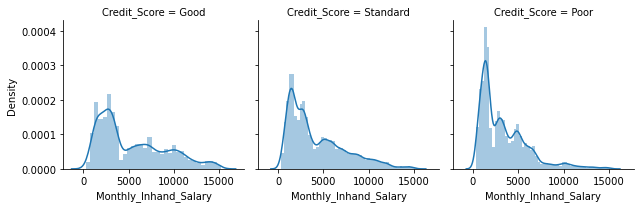

In [27]:
grid = sns.FacetGrid(df_total, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

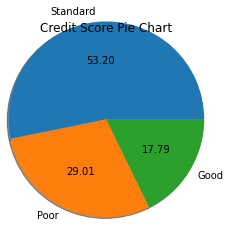

In [28]:
label = df_total.Credit_Score.value_counts().index
label_count = df_total.Credit_Score.value_counts().values
plt.figure(figsize=(3,3))
plt.pie(data=df_total, x=label_count, labels=label, autopct='%.2f', shadow=True, radius=1.5)
plt.title("Credit Score Pie Chart")
plt.show()

In [29]:
#plot(df_total,'Occupation','Credit_Score')

In [30]:
#plot(df_total,'Age','Credit_Score')

<AxesSubplot:>

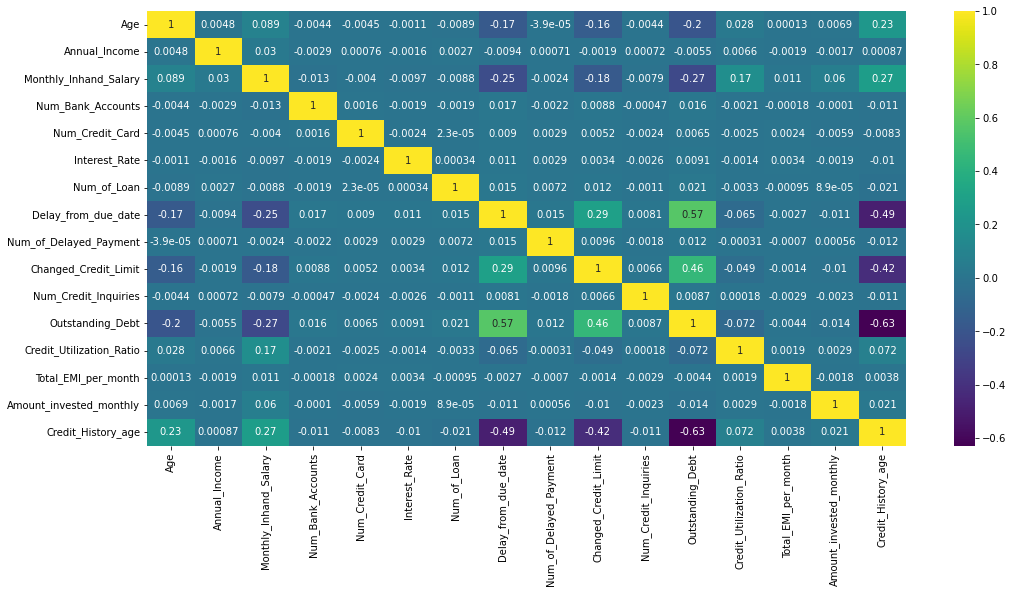

In [31]:
plt.figure(figsize=(17,8))
sns.heatmap(df_total.corr(),annot=True,cmap='viridis')

Text(0.5, 1.0, 'Violin Plot of Payment Behaviour by Age, Separated by Credit Score')

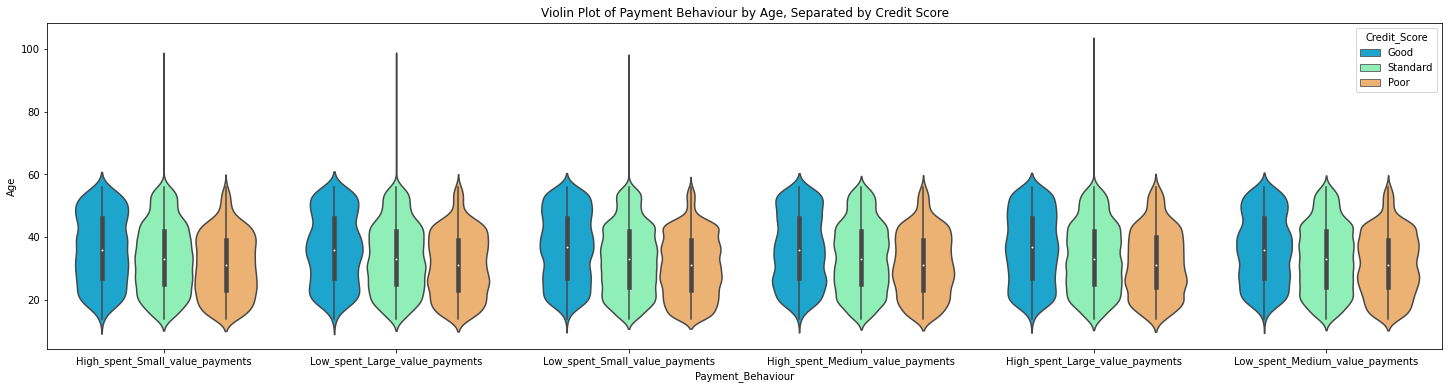

In [32]:
plt.figure(figsize=(25,6))
sns.violinplot(x='Payment_Behaviour',y='Age',data=df_total, hue='Credit_Score', palette='rainbow')
plt.title("Violin Plot of Payment Behaviour by Age, Separated by Credit Score")

Text(0.5, 1.0, 'Violin Plot of Payment Behaviour by Credit Utilization Ratio, Separated by Credit Score')

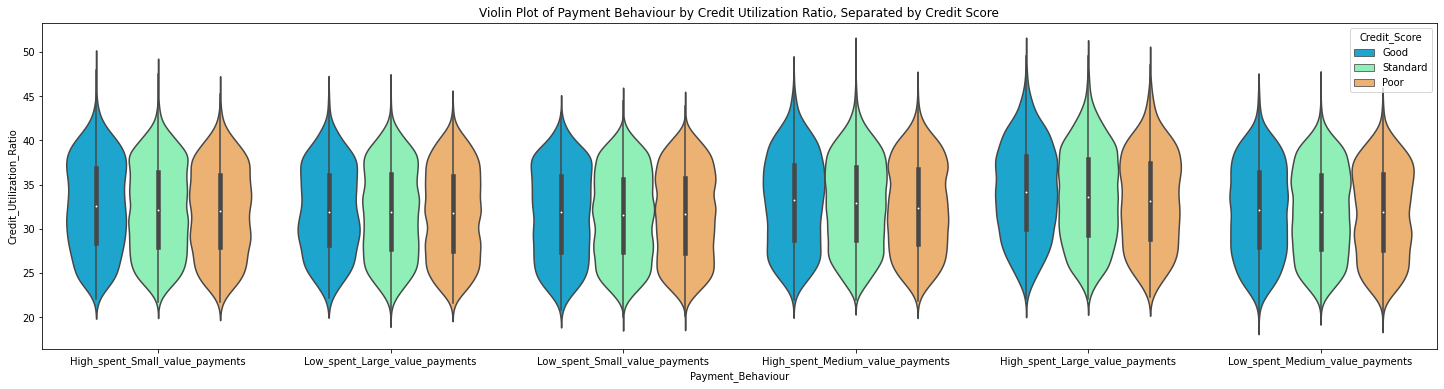

In [33]:
plt.figure(figsize=(25,6))
sns.violinplot(x='Payment_Behaviour',y='Credit_Utilization_Ratio',data=df_total, hue='Credit_Score', palette='rainbow')
plt.title("Violin Plot of Payment Behaviour by Credit Utilization Ratio, Separated by Credit Score")

<Figure size 4248x72 with 0 Axes>

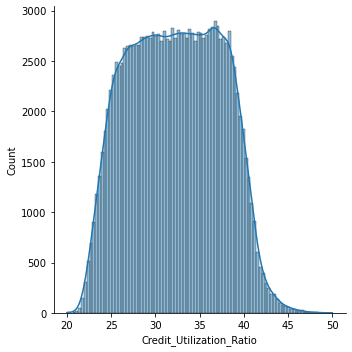

In [34]:
plt.figure(figsize=(59,1))
sns.displot(data=df_total, x="Credit_Utilization_Ratio", kde=True)

<Figure size 12960x432 with 0 Axes>

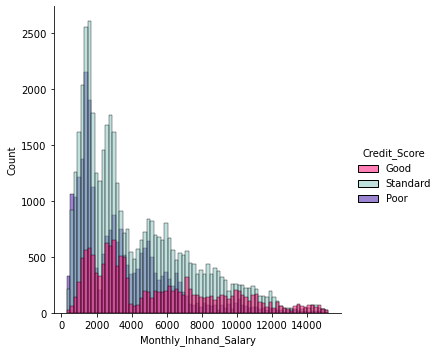

<Figure size 12960x432 with 0 Axes>

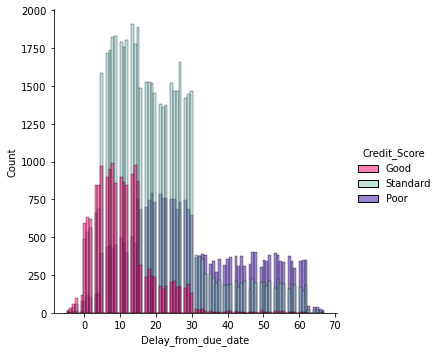

<Figure size 12960x432 with 0 Axes>

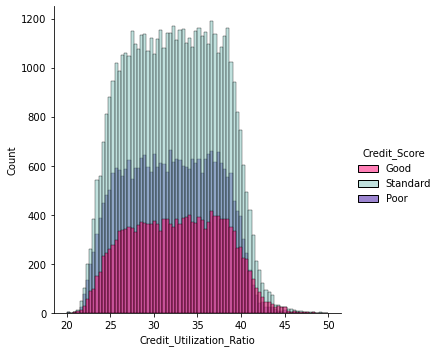

In [35]:
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio']

for col in numCols:
    plt.figure(figsize=(180,6))
    sns.displot(x=col,data=df_total, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

In [36]:
#DataPrep at its finest pra visualizar tudo, tirar insights, as distribuições, missing data zeros, etc e etc
# create_report(df_total)

### Seleção de Features e Feature Importance

In [37]:
#Dropar colunas inúteis (ids etc) e Changed Credit Limit e Credi History Age (vide heatmap)

#ExtraTreeClassifier para usar método feature_importances_

#Logistic regression do statsmodels para usar os testes de hipótese do método summary()

#Técnicas de feature selection da última aula sobre o tema

#Checar variância de cada feature
# pd.options.display.float_format = '{:.6f}'.format
# df_heart.apply(np.var).sort_values(ascending = False)[ : 8]

#Tentar usar o VIF (pode ser interessante ou inútil)

In [38]:
# colunas para dropar

In [39]:
## Modelo Statsmodels teste de hipótese

import statsmodels.api as sm

df2 = df_total.copy()
df2 = df2.drop(['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Type_of_Loan', 'Type_of_Loan_ajustado', 'Credit_History_Age', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio',
                'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_age'], axis=1)

X_train = df2[df2['test'] == 0].drop(['Credit_Score', 'test'], axis = 1)
X_test = df2[df2['test'] == 1].drop(['Credit_Score', 'test'], axis = 1)

X_train = pd.get_dummies(X_train, columns=['Occupation', 'Month', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Occupation', 'Month', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], drop_first=True)

from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

y_train = df2[df2['test'] == 0]['Credit_Score']
y_test = df2[df2['test'] == 1]['Credit_Score']

y_train = ordenc.fit_transform(y_train.values.reshape(-1,1))
y_test = y_test.replace(np.NaN, 0)

# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
non_reg_OLS = model.fit()
non_reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                              8917.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):                        0.00
Time:                        21:29:24   Log-Likelihood:                     -1.0891e+05
No. Observations:               97224   AIC:                                  2.179e+05
Df Residuals:                   97187   BIC:                                  2.183e+05
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Annual_Income                                       9.286e-09   1.66e-09      5.592      0.000    6.03e-09    1.25e-08
Num_Bank_Accounts                                   3.745e-05   2.02e-05      1.852      0.064   -2.18e-06    7.71e-05
Num_Credit_Card                                     5.562e-05   1.85e-05      3.013      0.003    1.94e-05    9.18e-05
Interest_Rate                                       1.938e-06   5.09e-06      0.381      0.704   -8.04e-06    1.19e-05
Num_of_Loan                                         1.951e-05   3.83e-05      0.510      0.610   -5.55e-05    9.45e-05
Delay_from_due_date                                    0.0054      0.000     26.682      0.000       0.005       0.006
Outstanding_Debt                                    4.201e-05   2.72e-06     15.434      0.000    3.67e-05    4.73e-05
Total_EMI_per_month                                 1.062e-06   2.87e-07      3.696      0.000    4.99e-07    1.62e-06
Occupation_Architect                                   0.3666      0.011     33.473      0.000       0.345       0.388
Occupation_Developer                                   0.3596      0.011     32.524      0.000       0.338       0.381
Occupation_Doctor                                      0.3740      0.011     33.617      0.000       0.352       0.396
Occupation_Engineer                                    0.3311      0.011     30.185      0.000       0.310       0.353
Occupation_Entrepreneur                                0.3561      0.011     32.173      0.000       0.334       0.378
Occupation_Journalist                                  0.3248      0.011     29.109      0.000       0.303       0.347
Occupation_Lawyer                                      0.3744      0.011     34.609      0.000       0.353       0.396
Occupation_Manager                                     0.3605      0.011     32.174      0.000       0.339       0.382
Occupation_Mechanic                                    0.3797      0.011     34.485      0.000       0.358       0.401
Occupation_Media_Manager                               0.3576      0.011     32.383      0.000       0.336       0.379
Occupation_Musician                                    0.3588      0.011     31.915      0.000       0.337       0.381
Occupation_Scientist                                   0.3512      0.011     31.960      0.000       0.330       0.373
Occupation_Teacher                                     0.3291      0.011     29.765      0.000       0.307       0.351
Occupation_Writer                                      0.3908      0.011     34.709      0.000       0.369       0.413
Month_Aug

In [40]:
#VIF
def calc_vif(data):
    vif_df = pd.DataFrame(columns=['Var', 'VIF'])
    x_var_names = data.columns
    
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop(x_var_names[i])]
        r2 = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-r2),3)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by='VIF',axis = 0, ascending=False, inplace=False)

calc_vif(X_train)

,Var,VIF
5,Delay_from_due_date,4.793
6,Outstanding_Debt,4.409
2,Num_Credit_Card,1.029
7,Total_EMI_per_month,1.028
3,Interest_Rate,1.024
1,Num_Bank_Accounts,1.021
0,Annual_Income,1.015
4,Num_of_Loan,1.003
14,Occupation_Lawyer,0.052
19,Occupation_Scientist,0.049


<AxesSubplot:>

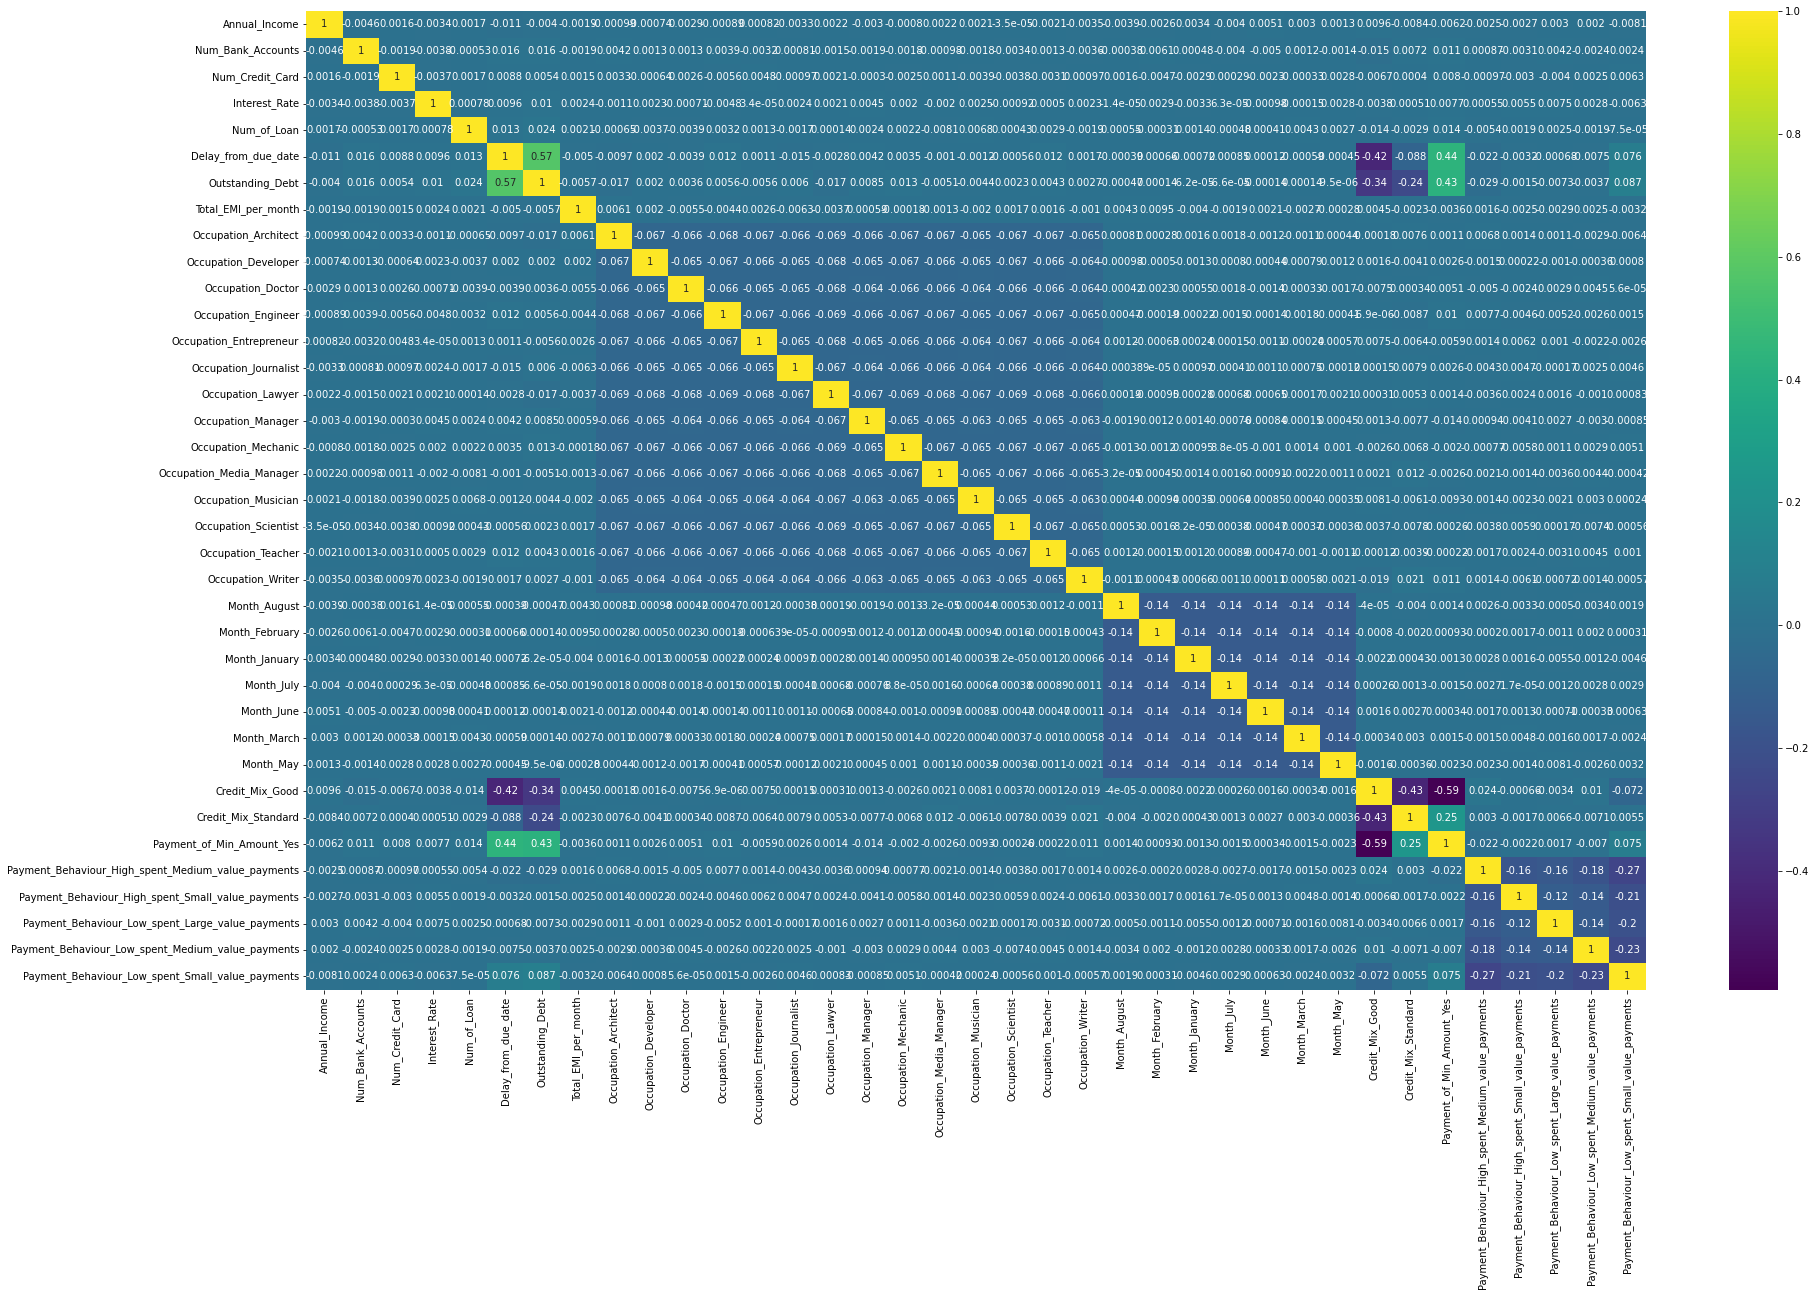

In [41]:
plt.figure(figsize=(30,18))
sns.heatmap(X_train.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

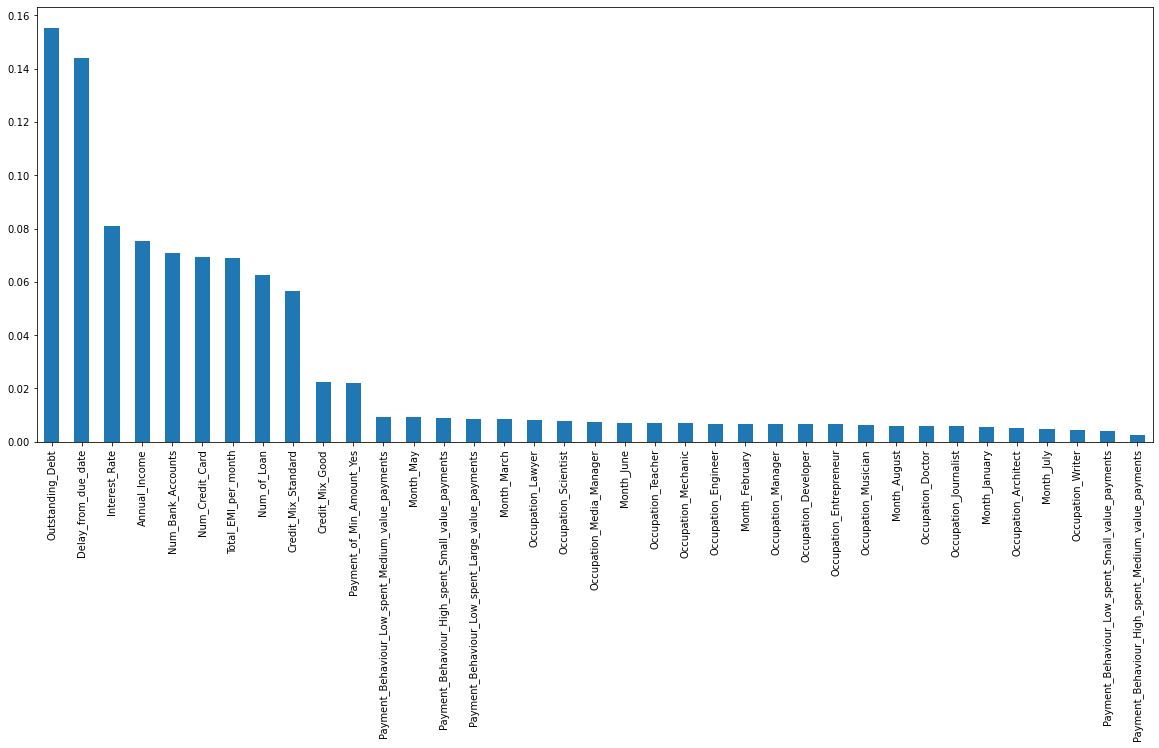

In [42]:
#ExtraTreeClassifier para feature_importances_

from sklearn.tree import ExtraTreeClassifier

xtc = ExtraTreeClassifier()
xtc.fit(X_train, y_train)
feat_importance = pd.Series(xtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(20,8))
feat_importance.plot(kind='bar')

##### - Inputação de Dados

In [43]:
# escolher colunas para inputar e as formas de fazê-lo

### Pré-processamento para modelagem

In [44]:
#Testar dados normalizados e/ou padronizados de formas diferentes (MinMax, Standard, Robust, sem normalizar, etc)

#Encoding (OneHot, Dummy, Label, Ordinary etc)



### Modelagem

In [45]:
# modelos referência (random ou dummy classifier), base (random forest com plot, extratrees, XGBoost, rede neural simples) e ensembles (stacking de xgboost com )